# Multiple classification of News

In this notebook, we leverage the power of a neural network to accurately classify news articles into their respective categories. By employing advanced machine learning techniques, we can analyze the content and characteristics of each news piece to make informed predictions about its category.

With the help of a neural network model, we aim to achieve high accuracy and reliable classification results. This approach allows us to leverage the network's ability to learn intricate patterns and relationships within the data, enabling us to make more accurate category assignments for each news article.

By harnessing the potential of neural networks, we can unlock valuable insights and automate the categorization process, saving time and effort in manually labeling news articles. This approach enables us to handle large volumes of data efficiently and deliver precise categorization results.

Through this notebook, we demonstrate the effectiveness of neural networks in tackling complex classification tasks and showcase their potential in the realm of news analysis and categorization.




### Necessary Package

In [ ]:
import numpy as np
from keras import layers, models
from keras.datasets import reuters

We load the data

In [ ]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


We explore the data:

In [ ]:
train_data.shape

(8982,)

These numbers represent words. To see these words we do the following:

In [ ]:
word_index = reuters.get_word_index()
word_index = dict([(value, key) for (key, value) in word_index.items()])
for _ in train_data[0]:
  print(word_index.get(_-3))

Since the data in train_data does not possess the required structure to be directly analyzed by a neural network, we need to undergo a crucial step known as data vectorization. This process involves transforming the data into a numerical representation that can be effectively processed by the neural network.

Vectorization enables us to convert the information in A, which may be in the form of text, images, or any other non-numeric format, into a suitable numerical format. This allows the neural network to interpret and analyze the data, extracting meaningful patterns and relationships.

Depending on the nature of the data in train_data, different techniques of vectorization may be employed. For textual data, methods such as word embedding or one-hot encoding can be used to convert words into numeric vectors. For image data, techniques like pixel intensity representation or convolutional neural networks can be utilized to transform images into numerical matrices.

By performing data vectorization, we bridge the gap between the non-numeric data in train_data and the numerical requirements of the neural network. This pivotal step lays the foundation for successful analysis, as it enables the neural network to process and understand the underlying patterns in the data, leading to accurate predictions and valuable insights.

In [ ]:
def vectorize(sequences, dim = 10000):
  results = np.zeros((len(sequences), dim))

  for i, sequences in enumerate(sequences):
    results[i, sequences] = 1
  return results

In [ ]:
x_train = vectorize(train_data)
x_test = vectorize(test_data)

In [ ]:
x_train.shape

(8982, 10000)

We apply to_categorical() to labels to have a matrix representation of each classification

In [ ]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Create the model
We have configured the input layer with 64, as well as an internal layer with the same number of neurons and added a final layer with 46 neurons to accommodate the 46 possible results.

To reduce the overfitting and improve the accuracy, we apply two dropout layers and simplify the model.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(55, activation='relu', input_shape = (10000,)))
model.add(layers.Dropout(0.30))
model.add(layers.Dense(55, activation='relu'))
model.add(layers.Dropout(0.30))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics='accuracy',
              run_eagerly=True)

Now we divide our data to get validation and training data

In [ ]:
x_validation = x_train[:1000]
partial_x_train = x_train[1000:]

y_validation = y_train[:1000]
partial_y_train = y_train[1000:]

In [ ]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_validation,y_validation))

Epoch 1/20
16/16 [==============================] - 2s 105ms/step - loss: 3.0320 - accuracy: 0.3941 - val_loss: 2.0697 - val_accuracy: 0.5950
Epoch 2/20
16/16 [==============================] - 2s 127ms/step - loss: 1.9249 - accuracy: 0.5912 - val_loss: 1.5165 - val_accuracy: 0.6590
Epoch 3/20
16/16 [==============================] - 2s 122ms/step - loss: 1.5175 - accuracy: 0.6545 - val_loss: 1.3176 - val_accuracy: 0.6940
Epoch 4/20
16/16 [==============================] - 1s 90ms/step - loss: 1.3335 - accuracy: 0.6869 - val_loss: 1.2135 - val_accuracy: 0.7180
Epoch 5/20
16/16 [==============================] - 1s 90ms/step - loss: 1.1925 - accuracy: 0.7191 - val_loss: 1.1427 - val_accuracy: 0.7330
Epoch 6/20
16/16 [==============================] - 1s 89ms/step - loss: 1.0937 - accuracy: 0.7448 - val_loss: 1.0809 - val_accuracy: 0.7510
Epoch 7/20
16/16 [==============================] - 1s 89ms/step - loss: 0.9964 - accuracy: 0.7663 - val_loss: 1.0531 - val_accuracy: 0.7560
Epoch 8/20

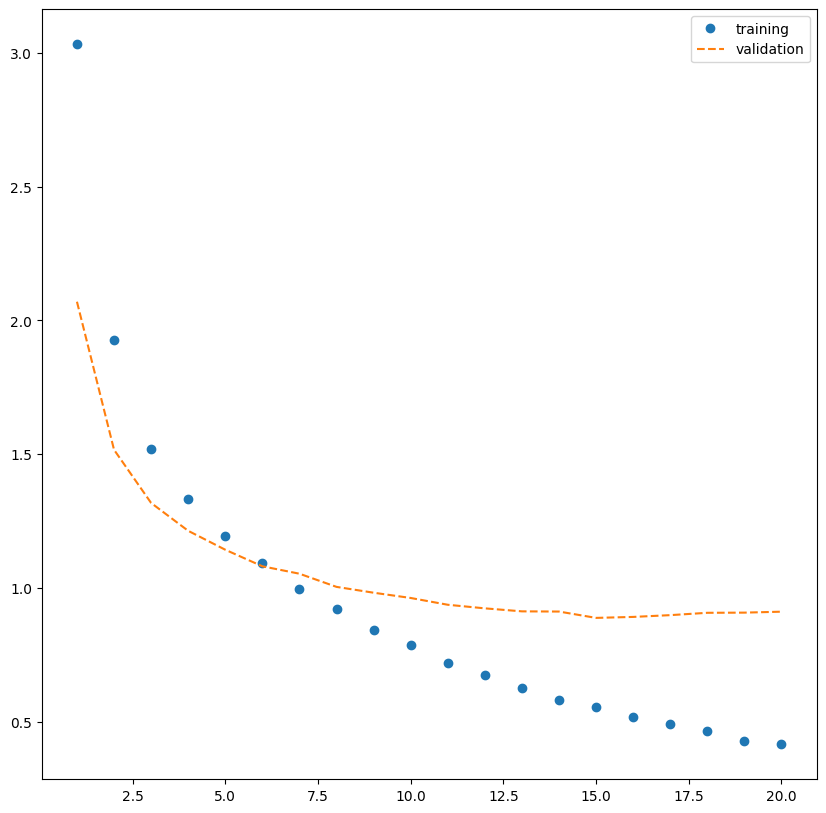

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1, len(loss_values)+1)
plt.plot(epoch, loss_values,"o", label='training')
plt.plot(epoch, val_loss_values,"--", label='validation')
plt.legend()
plt.show()

In [ ]:
model.evaluate(x_test,y_test)

71/71 [==============================] - 2s 22ms/step - loss: 1.0184 - accuracy: 0.7827


[1.0184435844421387, 0.7827248573303223]

In conclusion, this notebook demonstrates the successful application of a neural network for multiple classification of news articles, achieving an accuracy of 78%. By utilizing advanced machine learning techniques, we were able to accurately classify news articles into their respective categories.